In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, SequentialFeatureSelector

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

1. Сгенерируйте данные с помощью кода:
```
from sklearn.datasets import make_classification  
x_data_generated, y_data_generated = make_classification(scale=1)
```



In [2]:
X, y = make_classification(scale=1, random_state=42)

In [3]:
df = pd.DataFrame(X)
df['target'] = y

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-2.025143,0.029102,-0.474945,-0.114736,0.504987,0.088962,0.404982,-0.653329,0.186454,-0.661786,...,2.143944,1.765454,0.852433,0.633919,0.087142,-0.792521,-0.334501,0.865755,-1.200296,0
1,1.613711,0.659924,-0.150056,-1.227608,0.597400,0.865620,0.015579,0.125576,0.453534,-0.244157,...,0.321357,-0.173072,0.964087,0.421921,0.963360,1.189470,1.375707,0.701173,-0.297564,0
2,0.166452,0.950573,1.420504,-0.530997,-0.623141,-2.255540,0.471416,-0.570746,0.492451,0.289169,...,-1.122722,-0.832356,2.455300,0.382410,-1.692005,-0.637740,1.189017,-0.555477,-0.637387,1
3,0.698223,-0.320670,1.735964,-0.535235,1.317394,-1.146581,-0.483886,0.197911,0.393485,0.895193,...,0.059630,-0.651418,0.635172,-0.646937,-1.106450,1.049553,-0.689188,0.197600,2.075261,1
4,0.179894,-0.222100,0.105376,0.940771,-0.982487,1.560103,0.319782,-1.334025,1.392002,0.918317,...,-0.988591,-0.601368,-1.570501,-1.103589,1.303736,-0.989628,-0.968344,-0.224633,0.550052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.534114,1.431401,-0.248964,0.115675,1.179297,-1.367164,1.368632,0.971571,1.277677,0.332314,...,0.711615,0.645376,-0.748487,-1.124642,-0.763516,1.551152,1.755341,0.067518,2.060748,0
96,-0.220964,-0.545612,-0.571179,-0.681984,-1.001620,-0.921694,0.924634,0.572583,0.026886,0.208383,...,1.503398,1.399355,-2.041735,0.877362,-0.977637,-0.247177,0.640843,-0.281100,1.797687,1
97,-0.039555,-1.604993,0.222134,-0.516045,0.096121,-0.021852,-0.894607,-0.478749,0.681501,0.028318,...,-1.081057,1.255756,0.029756,1.053153,-0.511036,0.938284,-0.309172,-0.462275,-0.434496,1
98,1.085896,1.203166,-0.609512,0.557810,0.010353,0.417673,0.529693,-0.186971,0.474698,-0.025027,...,0.028181,0.056650,0.817766,-0.009119,0.735948,1.390208,-0.305225,-1.311836,-1.065114,0


2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:  
```cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()```

In [5]:
def get_accuracy_frame(title, estimator_model, X_data, y_data):
  mean_accuracy = cross_val_score(estimator_model, X_data, y_data, scoring='accuracy').mean()

  return pd.DataFrame({
      'estimator': [title],
      'quantity of features': [X_data.shape[1]],
      'mean accuracy': [mean_accuracy]
  })

In [6]:
def concat_accuracy(main_dataframe, title, estimator_model, X_data, y_data):
  new_frame = get_accuracy_frame(title, estimator_model, X_data, y_data)
  result_frame = pd.concat([main_dataframe,
                           new_frame]
                           )
  result_frame = result_frame.sort_values('mean accuracy', ascending=False)
  result_frame = result_frame.reset_index(drop=True)

  return result_frame

In [7]:
results = get_accuracy_frame('no selection', LogisticRegression(), X, y)
results

,estimator,quantity of features,mean accuracy
0,no selection,20,0.98


3. Используйте статистические методы для отбора признаков:  

    a) Выберите признаки на основе матрицы корреляции.  

    b) Отсеките низковариативные признаки (VarianceThreshold).  
    
    c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [8]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,1.000000,0.071284,-0.036813,-0.004537,0.193129,0.044753,-0.079165,-0.009668,-0.071911,-0.110540,...,-0.057773,-0.118258,0.019486,-0.121935,0.085189,0.083840,-0.104628,-0.065805,0.005317,-0.088754
1,0.071284,1.000000,-0.101191,-0.140801,0.059319,-0.617260,0.078905,-0.083252,-0.201323,0.045150,...,0.025726,-0.039091,-0.017137,-0.027894,-0.309667,0.083481,-0.036901,-0.035538,0.095836,-0.763444
2,-0.036813,-0.101191,1.000000,0.027711,-0.049272,0.140555,0.252284,-0.000123,0.058174,0.077953,...,-0.024688,0.128741,0.002441,0.047610,0.125716,-0.031936,-0.036005,0.004602,-0.003610,0.088433
3,-0.004537,-0.140801,0.027711,1.000000,0.080622,0.095910,-0.035280,0.030517,0.198355,-0.069286,...,0.003402,-0.040230,-0.068040,0.005388,0.054477,-0.038142,-0.211415,0.040188,0.168545,0.118718
4,0.193129,0.059319,-0.049272,0.080622,1.000000,0.079251,-0.035188,-0.037175,-0.152131,-0.148384,...,0.002554,-0.075766,0.143518,0.037858,0.121663,-0.042373,-0.073803,-0.128797,0.111514,-0.172387
5,0.044753,-0.617260,0.140555,0.095910,0.079251,1.000000,-0.017531,-0.087657,0.168142,-0.087673,...,-0.124990,-0.012449,0.072853,0.040140,0.939231,-0.028756,-0.018214,0.000762,-0.128623,0.108329
6,-0.079165,0.078905,0.252284,-0.035280,-0.035188,-0.017531,1.000000,-0.184477,-0.035569,0.011276,...,0.067302,0.038931,0.016508,-0.269536,0.013241,0.076254,-0.027008,0.071684,-0.001482,-0.166805
7,-0.009668,-0.083252,-0.000123,0.030517,-0.037175,-0.087657,-0.184477,1.000000,0.113130,0.026654,...,0.130702,0.093107,-0.183456,0.115421,-0.142264,-0.104928,0.142065,0.064365,0.081591,0.146512
8,-0.071911,-0.201323,0.058174,0.198355,-0.152131,0.168142,-0.035569,0.113130,1.000000,-0.050063,...,-0.127416,0.065865,-0.096214,0.033775,0.115366,0.094542,-0.084320,-0.038142,-0.028969,0.195757
9,-0.110540,0.045150,0.077953,-0.069286,-0.148384,-0.087673,0.011276,0.026654,-0.050063,1.000000,...,0.124842,0.071224,0.147287,0.175982,-0.086258,0.110768,0.049218,-0.128464,-0.062361,-0.023958


In [9]:
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.set_context('poster', font_scale=0.3)

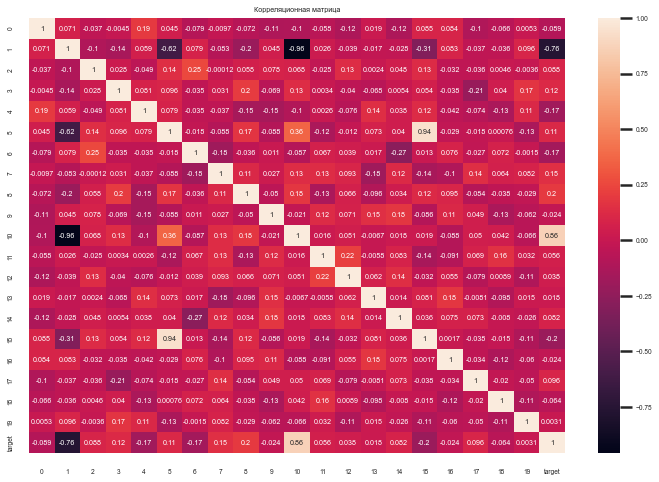

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляционная матрица')
plt.show()

Оставим 5 признаков с наиболее высокой корреляцией.

In [11]:
correlations = df.corr()['target'].drop('target')
top_five = correlations.abs().nlargest(5)
features = top_five.index.tolist()

In [12]:
X_corr = df.iloc[:, features]

In [13]:
results = concat_accuracy(results, 'correlation selection', LogisticRegression(), X_corr, y)
results

,estimator,quantity of features,mean accuracy
0,no selection,20,0.98
1,correlation selection,5,0.98


Показатель точности остался неизменным.

Перейдем к VarianceThreshold.

In [14]:
selector = VarianceThreshold(threshold=1)
selector.fit_transform(X)
features = selector.get_support(indices=True)

In [15]:
X_threshold = df.iloc[:, features]

In [16]:
results = concat_accuracy(results, 'threshold selection', LogisticRegression(), X_threshold, y)
results

,estimator,quantity of features,mean accuracy
0,no selection,20,0.98
1,correlation selection,5,0.98
2,threshold selection,9,0.97


4. Осуществите отбор признаков на основе дисперсионного анализа:  

    a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif [(SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)(f_classif, k=5)).  
    
    b) Повторите п. 2 на отобранных признаках.

In [17]:
selector = SelectKBest(k=5) # Parameters: score_func : callable, default=f_classif
selector.fit_transform(X, y)
features = selector.get_support(indices=True)

In [18]:
X_kbest = df.iloc[:, features]

In [19]:
results = concat_accuracy(results, 'kbest selection', LogisticRegression(), X_kbest, y)
results

,estimator,quantity of features,mean accuracy
0,no selection,20,0.98
1,correlation selection,5,0.98
2,kbest selection,5,0.98
3,threshold selection,9,0.97


5. Отбор с использованием моделей:  

    a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию ([SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)). Используйте L1 регуляризацию.  

    b) Реализуйте отбор признаков с помощью модели [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и встроенного атрибута feature_impotance.
      
    c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [20]:
lr_selector = LogisticRegression(penalty='l1', solver='liblinear')
lr_selector.fit(X, y)

selector = SelectFromModel(estimator=lr_selector, max_features=5)
selector.fit_transform(X, y)
features = selector.get_support(indices=True)

In [21]:
X_l1 = df.iloc[:, features]

In [22]:
results = concat_accuracy(results, 'l1 selection', LogisticRegression(), X_l1, y)
results

,estimator,quantity of features,mean accuracy
0,l1 selection,5,0.99
1,no selection,20,0.98
2,correlation selection,5,0.98
3,kbest selection,5,0.98
4,threshold selection,9,0.97


In [23]:
selector = RandomForestClassifier(random_state=42)
selector.fit(X, y)
feature_importances = selector.feature_importances_
features = feature_importances.argsort()[-5:]

In [24]:
X_rf = df.iloc[:, features]

In [25]:
results = concat_accuracy(results, 'random forest selection', RandomForestClassifier(random_state=42), X_rf, y)
results

,estimator,quantity of features,mean accuracy
0,l1 selection,5,0.99
1,no selection,20,0.98
2,correlation selection,5,0.98
3,kbest selection,5,0.98
4,threshold selection,9,0.97
5,random forest selection,5,0.94


6. Перебор признаков:  

    a) [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html).  
    
    b) Повторите п. 2 на отобранных признаках.

In [26]:
selector = SequentialFeatureSelector(SVC(kernel='poly'), n_features_to_select=5)
selector.fit(X, y)
features = selector.get_support(indices=True)

In [27]:
X_sfs = df.iloc[:, features]

In [28]:
results = concat_accuracy(results, 'sequential feature selection', LogisticRegression(), X_sfs, y)

7. Сформулируйте выводы по проделанной работе:  

    a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [29]:
results

,estimator,quantity of features,mean accuracy
0,l1 selection,5,0.99
1,sequential feature selection,5,0.99
2,no selection,20,0.98
3,correlation selection,5,0.98
4,kbest selection,5,0.98
5,threshold selection,9,0.97
6,random forest selection,5,0.94
